In [1]:
pwd()

"/groups/scicompsoft/home/arthurb/projects/darshan/ArthurKimChenPreibischDarshan2023"

In [2]:
]activate .

  Activating project at `/groups/scicompsoft/home/arthurb/projects/darshan/ArthurKimChenPreibischDarshan2023`


In [3]:
using TrainSpikingNet

In [4]:
param("neuropixel-left-N66002-K0-L32/");

In [5]:
config("neuropixel-left-N66002-K0-L32/", :cpu);

LBTConfig([ILP64] libmkl_rt.so, [LP64] libmkl_rt.so)


In [6]:
init(spikerate_file="PSTH-smoothed-left.jld2");

mean excitatory firing rate: 5.880109693645647 Hz
mean inhibitory firing rate: 5.879761219356989 Hz


In [7]:
config("neuropixel-left-N66002-K0-L32/", :gpu);

In [8]:
train(nloops=100, correlation_interval=5);

Loop no. 1, task no. 1
elapsed time: 25.320796966552734 sec
firing rate: 7.229458955789219 Hz
Loop no. 2, task no. 1
elapsed time: 6.855631113052368 sec
firing rate: 7.494041847216751 Hz
Loop no. 3, task no. 1
elapsed time: 6.384562015533447 sec
firing rate: 7.5191660858761855 Hz
Loop no. 4, task no. 1
elapsed time: 6.290586948394775 sec
firing rate: 7.510912548104603 Hz
Loop no. 5, task no. 1
correlation: 0.02554882728172553 (5 are NaN)
elapsed time: 42.62943911552429 sec
firing rate: 7.568880488470047 Hz
Loop no. 6, task no. 1
elapsed time: 7.164881944656372 sec
firing rate: 7.542998697009182 Hz
Loop no. 7, task no. 1
elapsed time: 5.992876052856445 sec
firing rate: 7.530476349201539 Hz
Loop no. 8, task no. 1
elapsed time: 6.349858999252319 sec
firing rate: 7.580739977576437 Hz
Loop no. 9, task no. 1
elapsed time: 6.121692895889282 sec
firing rate: 7.533313384442896 Hz
Loop no. 10, task no. 1
correlation: 0.058869240190313574 (5 are NaN)
elapsed time: 35.81434392929077 sec
firing rat

elapsed time: 6.392711877822876 sec
firing rate: 7.520976637071604 Hz
Loop no. 82, task no. 1
elapsed time: 5.988169193267822 sec
firing rate: 7.468997151601466 Hz
Loop no. 83, task no. 1
elapsed time: 5.9674341678619385 sec
firing rate: 7.425604527135541 Hz
Loop no. 84, task no. 1
elapsed time: 6.316199064254761 sec
firing rate: 7.584315626799188 Hz
Loop no. 85, task no. 1
correlation: 0.45255264524493655 (5 are NaN)
elapsed time: 35.446754932403564 sec
firing rate: 7.575891639647283 Hz
Loop no. 86, task no. 1
elapsed time: 6.4057769775390625 sec
firing rate: 7.5602292354777125 Hz
Loop no. 87, task no. 1
elapsed time: 6.0449841022491455 sec
firing rate: 7.603887003424139 Hz
Loop no. 88, task no. 1
elapsed time: 6.029608964920044 sec
firing rate: 7.5128708220963 Hz
Loop no. 89, task no. 1
elapsed time: 5.936469078063965 sec
firing rate: 7.593572922032665 Hz
Loop no. 90, task no. 1
correlation: 0.4461545953201624 (5 are NaN)
elapsed time: 35.62108898162842 sec
firing rate: 7.44327823399

In [9]:
using JLD2

In [10]:
curves = load("neuropixel-left-N66002-K0-L32/learning-curve.jld2")

Dict{String, Any} with 3 entries:
  "correlation"  => Union{Missing, Float64}[missing, missing, missing, missing,…
  "elapsed_time" => [25.3208, 6.85563, 6.38456, 6.29059, 42.6294, 7.16488, 5.99…
  "firing_rate"  => [7.22946, 7.49404, 7.51917, 7.51091, 7.56888, 7.543, 7.5304…

In [11]:
using CairoMakie

In [12]:
ipresent = findall(!ismissing(x) for x in curves["correlation"]);   # skip missing values

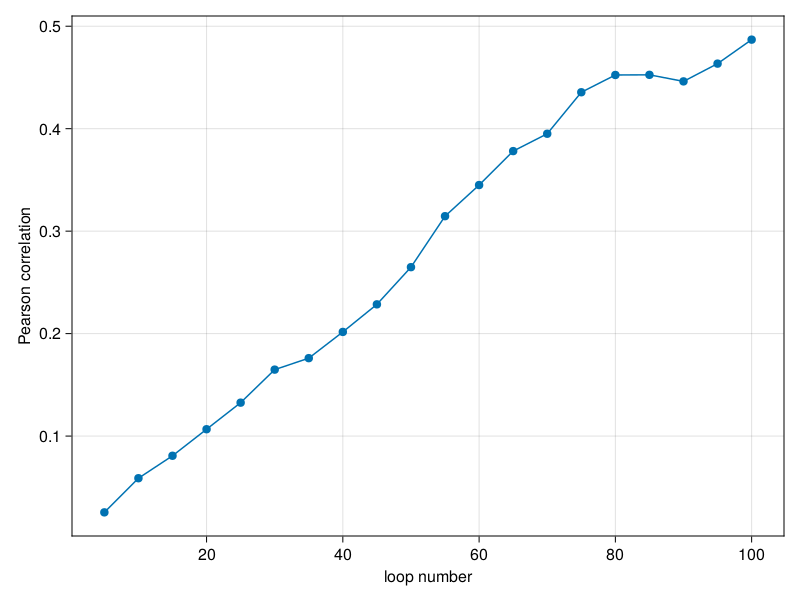

In [13]:
fig, ax, _ = scatterlines(ipresent, curves["correlation"][ipresent])
ax.xlabel = "loop number"
ax.ylabel = "Pearson correlation"
fig

In [14]:
p = load("neuropixel-left-N66002-K0-L32/param.jld2", "param");
data = load("PSTH-smoothed-left.jld2") |> values |> first    # Ntime x Ncells

150×66002 Matrix{Float64}:
 0.5625    1.3125   0.0        8.1875   …  6.38112  27.5787   0.480769
 0.611111  1.44444  0.0        8.16667     6.21601  28.1274   0.42735
 0.55      1.4      0.0        8.1         6.18881  28.6364   0.384615
 0.545455  1.27273  0.0        7.86364     6.23013  29.6885   0.381437
 0.5       1.20833  0.0        7.91667     6.03147  30.3322   0.34965
 0.5       1.23077  0.0384615  8.03846  …  5.83647  30.581    0.322754
 0.5       1.28571  0.0357143  8.25        5.71928  30.8691   0.324675
 0.566667  1.3      0.0333333  8.33333     5.64103  30.7459   0.32634
 0.6       1.26667  0.0333333  8.23333     5.61772  30.7925   0.37296
 0.6       1.23333  0.0333333  8.43333     5.36131  31.0956   0.39627
 0.6       1.26667  0.0333333  8.4      …  5.36131  31.0956   0.41958
 0.6       1.23333  0.0333333  8.33333     5.29138  31.3054   0.32634
 0.7       1.23333  0.0333333  8.2         5.36131  31.4685   0.32634
 ⋮                                      ⋱            ⋮    

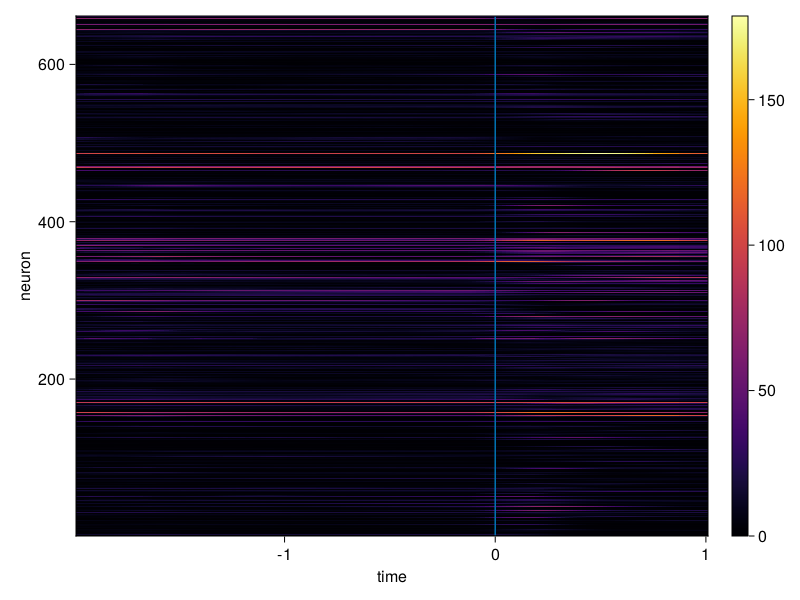

In [16]:
dv = @view data[:,1:100:end]   # only plot every 100th neuron
x = p.learn_every/1000 : p.learn_every/1000 : p.train_time/1000-1
y = 1:size(dv,2)
fig, ax, hm = heatmap(x.-2, y, dv, colormap=:inferno)
Colorbar(fig[1,2], hm)
lines!(ax, [0,0], [extrema(y)...])
ax.xlabel = "time"
ax.ylabel = "neuron"
fig

In [18]:
test(ntrials=200, ineurons_to_test=1:64);

using checkpoint 100
trial #1, task #1: 47.5 sec
trial #2, task #1: 59.0 sec
trial #3, task #1: 41.6 sec
trial #4, task #1: 66.3 sec
trial #5, task #1: 39.8 sec
trial #7, task #1: 40.5 sec
trial #6, task #1: 64.4 sec
trial #8, task #1: 39.9 sec
trial #10, task #1: 40.6 sec
trial #9, task #1: 65.7 sec
trial #11, task #1: 39.7 sec
trial #12, task #1: 65.6 sec
trial #13, task #1: 40.4 sec
trial #15, task #1: 39.6 sec
trial #14, task #1: 63.5 sec
trial #16, task #1: 38.4 sec
trial #17, task #1: 58.3 sec
trial #18, task #1: 38.1 sec
trial #20, task #1: 37.9 sec
trial #19, task #1: 58.5 sec
trial #21, task #1: 37.7 sec
trial #23, task #1: 37.7 sec
trial #22, task #1: 57.7 sec
trial #24, task #1: 37.8 sec
trial #25, task #1: 61.6 sec
trial #26, task #1: 40.5 sec
trial #28, task #1: 39.0 sec
trial #27, task #1: 60.9 sec
trial #29, task #1: 38.1 sec
trial #30, task #1: 53.0 sec
trial #31, task #1: 39.0 sec
trial #32, task #1: 38.1 sec
trial #33, task #1: 40.0 sec
trial #34, task #1: 38.3 sec
tr

In [19]:
model = load("neuropixel-left-N66002-K0-L32/test.jld2")

Dict{String, Any} with 4 entries:
  "ineurons_to_test" => 1:64
  "init_code"        => :(())
  "utotal"           => Any[Float32[-0.545698 -0.375156 … 0.65005 -0.320917; -0…
  "times"            => Any[Vector{UInt16}[[0x069d, 0x0fa8], [0x043c, 0x60c1], …

In [20]:
using StatsBase

In [25]:
nneurons = length(model["times"][1,1])
t = p.stim_off : p.learn_every : p.train_time
psths = Matrix{Float64}(undef, nneurons, length(t)-1)
for i = 1:nneurons
    times_ineuron = vcat([x[i] for x in model["times"][:,1]]...)  # spike time for neuron i across all trials
    psth = fit(Histogram, times_ineuron, t)
    psths[i,:] .= psth.weights
end

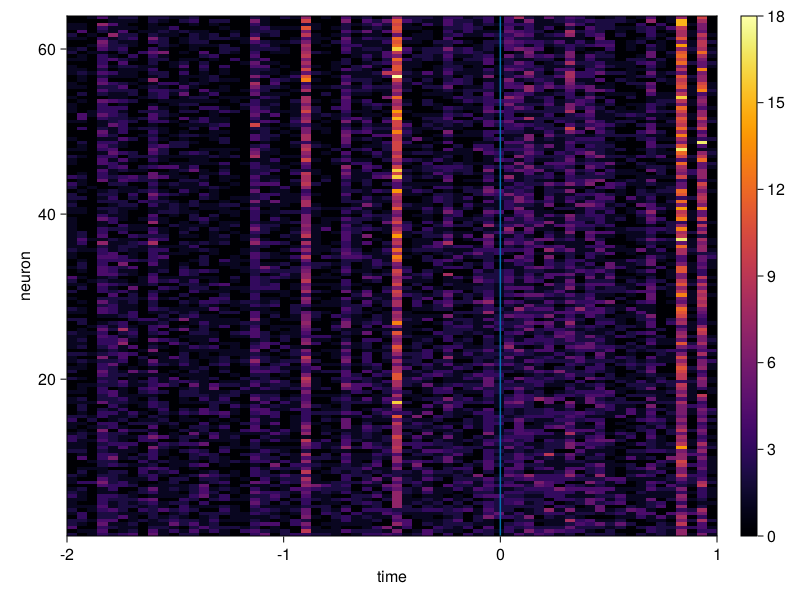

In [29]:
fig, ax, hm = heatmap(t / 1000 .- 3, 1:nneurons, psths, colormap=:inferno)
Colorbar(fig[1,2], hm)
lines!(ax, [0,0], [1,nneurons])
ax.xlabel = "time"
ax.ylabel = "neuron"
fig

In [30]:
# spike times for the first 16 neurons during the first trial and only task
times_trial1 = model["times"][1,1]

64-element Vector{Vector{UInt16}}:
 [0x069d, 0x0fa8]
 [0x043c, 0x60c1]
 [0x0352]
 [0x028c, 0x0a0d, 0x0ad2, 0x0d96, 0x0e24, 0x139a, 0x1535, 0x2330, 0x25bd, 0x29f3  …  0x691e, 0x6a4b, 0x70e7, 0x721d, 0x75b9, 0x7899, 0x8267, 0x90e3, 0x9a1c, 0x9bed]
 [0x02c2, 0x032c, 0x0b51, 0x0e9d, 0x17c7, 0x1b05, 0x2025, 0x38aa, 0x3dc4, 0x4ab6, 0x4d01, 0x51d6, 0x5cb8, 0x6160, 0x74c8, 0x9045]
 [0x2003, 0x21d9, 0x248e, 0x24a3, 0x2d46, 0x3488, 0x3dbb, 0x505c, 0x5810, 0x61fb, 0x76f5, 0x777f, 0x8ba9, 0x8dee]
 [0x0a84, 0x0fd9, 0x20b9, 0x21f7, 0x57ed, 0x7022, 0x70cf, 0x94b2]
 [0x1bf6, 0x2064, 0x4a50, 0x4e4b, 0x8826, 0x8f32, 0x92e4]
 [0x020e, 0x0871, 0x0a67, 0x1033, 0x13bc, 0x2507, 0x2589, 0x390a, 0x4790, 0x497e, 0x4d2b, 0x569a, 0x5db2, 0x608f, 0x7174, 0x89cf, 0x8f04]
 [0x0b88, 0x1329, 0x1e19, 0x2009, 0x217b, 0x374e]
 [0x0406, 0x26e0]
 [0x0108, 0x1f77, 0x21e8, 0x223d, 0x22a0, 0x391b, 0x3a07, 0x7931, 0x8780]
 [0x2250, 0x40e5, 0x4f6a, 0x608c, 0x704c, 0x9656, 0x9a60, 0x9b22]
 ⋮
 [0x0008, 0x0499, 0x079f, 0x0a57, 0x1

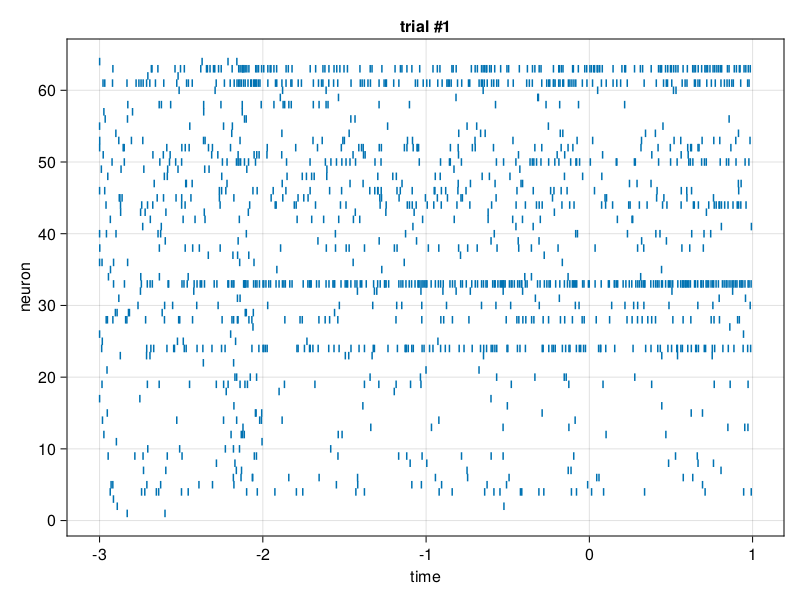

In [31]:
x = vcat(times_trial1...) .* p.dt / 1000
y = vcat([fill(i,length(x)) for (i,x) in enumerate(times_trial1)]...)
fig, ax, pts = scatter(x.-3, y, marker=:vline)
ax.xlabel = "time"
ax.ylabel = "neuron"
ax.title = "trial #1"
fig

In [32]:
ulearned = model["utotal"]  # a matrix for each trial...

200×1 Matrix{Any}:
 Float32[-0.5456978 -0.3751563 … 0.6500497 -0.3209174; -0.53020185 -0.367397 … 0.6462791 -0.31632182; … ; -0.5900588 -0.43716976 … 0.845832 -0.78019476; -0.59868616 -0.4356744 … 0.8405852 -0.7835127]
 Float32[-0.5572655 -0.39993763 … 0.6563617 -0.33352873; -0.5386051 -0.39772338 … 0.6524466 -0.34545398; … ; -0.7222009 -0.53957164 … 0.9160195 -0.7773533; -0.73442185 -0.5475275 … 0.92791575 -0.78677136]
 Float32[-0.55112904 -0.34973165 … 0.64914405 -0.3881806; -0.54120696 -0.3498849 … 0.64671576 -0.39455974; … ; -0.6390562 -0.49108726 … 0.77538645 -0.88140357; -0.6386405 -0.48511758 … 0.7992955 -0.8849049]
 Float32[-0.58607084 -0.43402228 … 0.6817133 -0.36793584; -0.5720321 -0.42988452 … 0.6650733 -0.3737882; … ; -0.6255808 -0.34482205 … 0.8816889 -0.77379715; -0.632639 -0.34031957 … 0.8956232 -0.7810211]
 Float32[-0.5432181 -0.41991892 … 0.6612909 -0.56363934; -0.5335206 -0.41853324 … 0.665364 -0.54912966; … ; -0.5699345 -0.40473768 … 0.7017758 -0.81192833; -0.5670323

In [33]:
ulearned[1]   # ...of Ntime x Ncell matrices

150×64 Matrix{Float32}:
 -0.545698  -0.375156  -0.872971  …  -0.628517  0.65005   -0.320917
 -0.530202  -0.367397  -0.86869      -0.617371  0.646279  -0.316322
 -0.515829  -0.361743  -0.855687     -0.600263  0.6444    -0.316078
 -0.500665  -0.353891  -0.848015     -0.577126  0.638455  -0.320599
 -0.494581  -0.346348  -0.841109     -0.559955  0.636479  -0.327201
 -0.49209   -0.339982  -0.823961  …  -0.544382  0.642806  -0.329507
 -0.494905  -0.334438  -0.815128     -0.531154  0.649594  -0.348547
 -0.496011  -0.323752  -0.81256      -0.517327  0.644577  -0.367394
 -0.49529   -0.311741  -0.796512     -0.50824   0.643988  -0.382385
 -0.487029  -0.306389  -0.796074     -0.499265  0.645066  -0.386893
 -0.48444   -0.309096  -0.80944   …  -0.487206  0.637126  -0.390519
 -0.483459  -0.308272  -0.810599     -0.473587  0.623     -0.396484
 -0.478606  -0.312151  -0.799078     -0.459532  0.610323  -0.410078
  ⋮                               ⋱                       
 -0.475047  -0.401083  -0.662475 

In [34]:
# Ntime x Ncells x Ntasks
utarget = load("neuropixel-left-N66002-K0-L32/utarg.jld2") |> values |> first

150×66002×1 Array{Float64, 3}:
[:, :, 1] =
 -0.501289  -0.358576  -0.749397  …  -0.0240227   0.466731   -0.525916
 -0.488083  -0.341223  -0.749397     -0.0306708   0.475752   -0.54407
 -0.504845  -0.346915  -0.749397     -0.0317778   0.484046   -0.560088
 -0.506156  -0.364091  -0.749397     -0.0300971   0.500982   -0.561341
 -0.51981   -0.373334  -0.749397     -0.0382519   0.51121    -0.574405
 -0.51981   -0.370068  -0.870006  …  -0.0464454   0.515138   -0.586305
 -0.51981   -0.362275  -0.878981     -0.0514649   0.519669   -0.585426
 -0.500119  -0.360294  -0.887292     -0.0548582   0.517734   -0.584669
 -0.491019  -0.364944  -0.887292     -0.0558755   0.518467   -0.564728
 -0.491019  -0.369698  -0.887292     -0.0672739   0.523217   -0.55557
 -0.491019  -0.364944  -0.887292  …  -0.0672739   0.523217   -0.546874
 -0.491019  -0.369698  -0.887292     -0.0704512   0.526493   -0.584669
 -0.466122  -0.369698  -0.887292     -0.0672739   0.529035   -0.584669
  ⋮                               ⋱ 

In [35]:
using Statistics

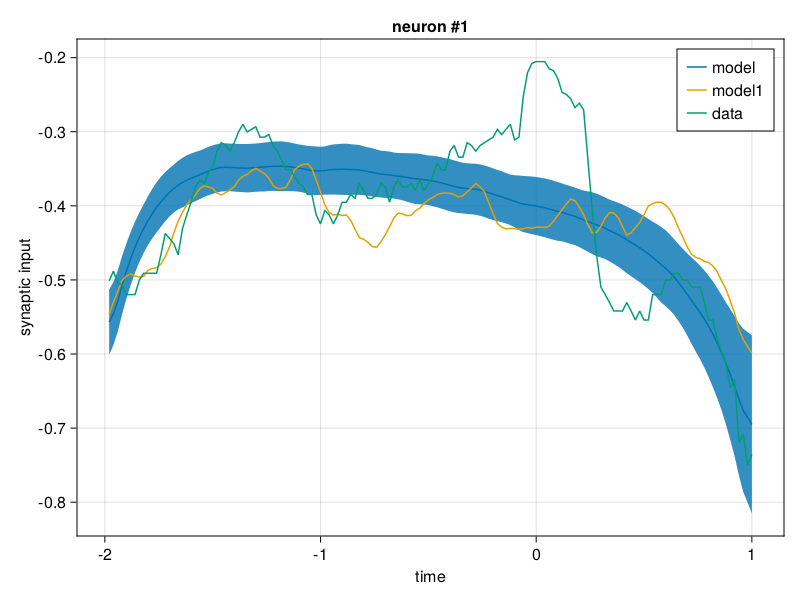

In [36]:
y_model = hcat([x[:,1] for x in ulearned[:,1]]...)
y_model_ave = dropdims(mean(y_model, dims=2), dims=2)
y_model_bar = dropdims(std(y_model, dims=2), dims=2)
x = (1:length(y_model_ave)) * p.learn_every / 1000 .- 2
fig, ax, _ = band(x, y_model_ave .- y_model_bar, y_model_ave .+ y_model_bar)
lines!(ax, x, y_model_ave, label="model")

y_model1 = ulearned[1,1][:,1]
lines!(ax, x, y_model1, label="model1")

y_data = utarget[:,1,1]
lines!(ax, x, y_data, label="data")

axislegend()
ax.xlabel = "time"
ax.ylabel = "synaptic input"
ax.title = "neuron #1"
fig

In [37]:
times_neuron1 = vcat([x[1] for x in model["times"][:,1]]...)  # spike time for neuron 1 across all trials
psth = fit(Histogram, times_neuron1, p.stim_off : p.learn_every : p.train_time)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1000.0:20.0:4000.0
weights: [2, 0, 4, 2, 2, 0, 1, 2, 1, 1  …  1, 0, 0, 1, 2, 0, 1, 1, 0, 0]
closed: left
isdensity: false

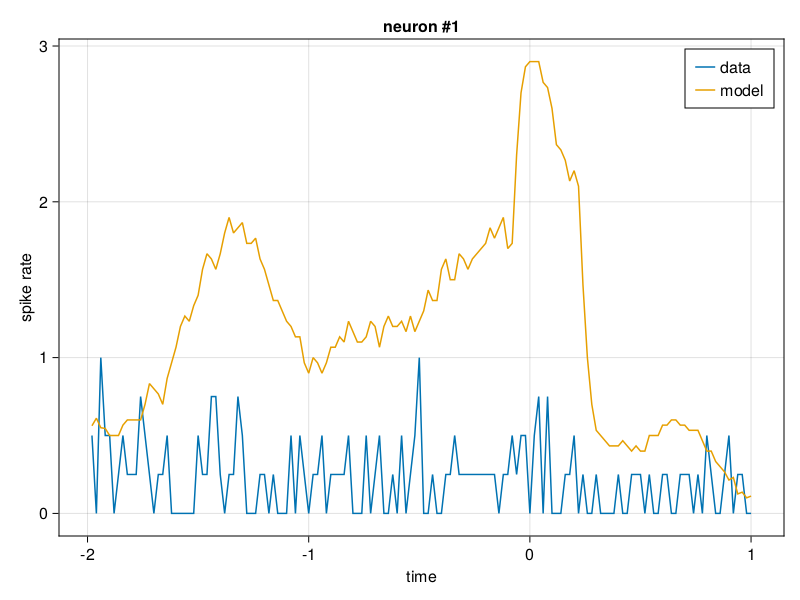

In [38]:
ntrials = size(model["times"], 1)
x = psth.edges[1][2:end] / 1000
y = psth.weights ./ ntrials ./ p.learn_every * 1000
fig, ax, _ = lines(x.-3, y, label="data")

y = @view data[:,1]
lines!(ax, x.-3, y, label="model")

axislegend()
ax.xlabel = "time"
ax.ylabel = "spike rate"
ax.title = "neuron #1"
fig